#
# Analyzing Embarked Town:
#

###
## Importing Necessary Stuff
###

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

###
## Loading Dataset
###

In [4]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
def impute_age(pclass, sex):
    
    if sex == 'male':
        
        if pclass == 1:
            return titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'male')]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['pclass'] == 2) & (titanic['sex'] == 'male')]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'male')]['age'].mean()
        
    else: 
        
        if pclass == 1:
            return titanic[(titanic['pclass'] == 1) & (titanic['sex'] != 'male')]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['pclass'] == 2) & (titanic['sex'] != 'male')]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['pclass'] == 3) & (titanic['sex'] != 'male')]['age'].mean()
        
titanic['age'] = titanic.apply( lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis = 1)

###
## Point Plot:
###

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


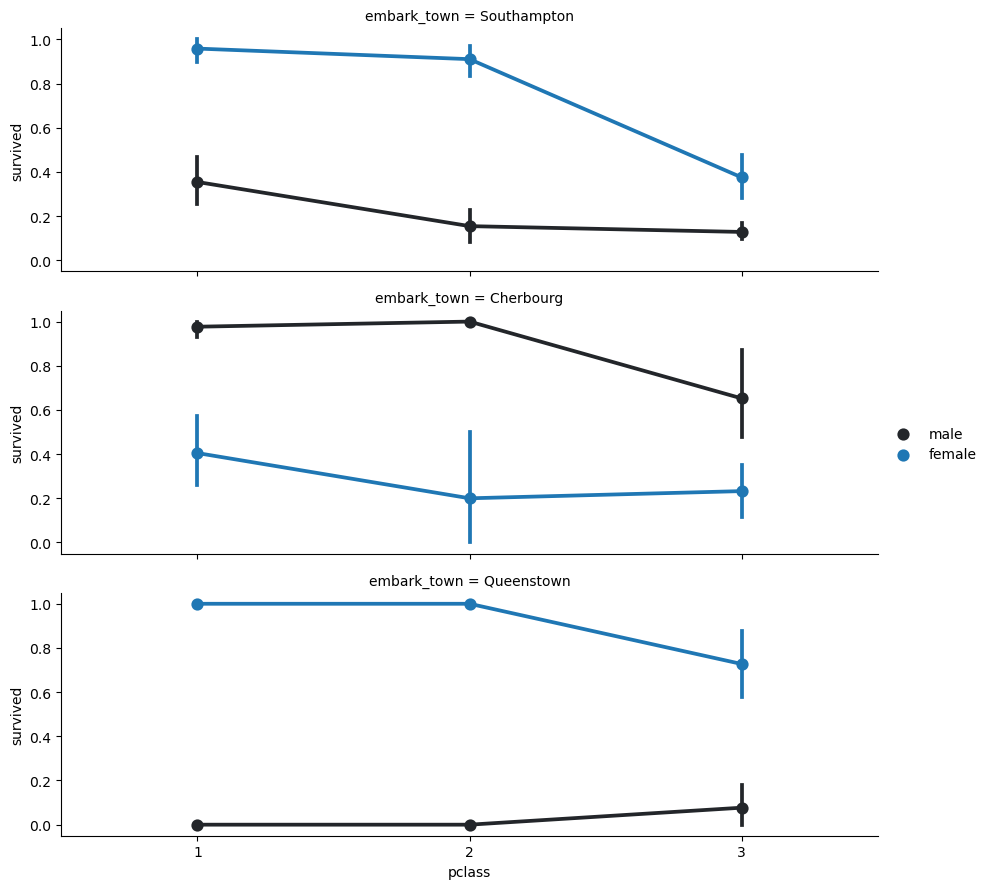

In [6]:
f = sns.FacetGrid( titanic, row = 'embark_town', height = 3, aspect = 3 )
f.map(sns.pointplot, 'pclass', 'survived', 'sex', hue_order = None)
f.add_legend()

###
## 'Embarked' Column Null Values
###

In [7]:
titanic['embarked'].isnull().sum()

2

###
## Embarked Coulmn Value Counts
###

In [24]:
print(f"Value Counts:\n\n{titanic['embarked'].value_counts()}\n\nTotal Values in embarked column:\n\n {len(titanic['embarked'])}")

Value Counts:

embarked
S              644
C              168
Q               77
Southampton      2
Name: count, dtype: int64

Total Values in embarked column:

 891


###
## Filling 'Embarked' Column Null Values
Filling al null values with **Southampton**

###

In [26]:
titanic['embarked'].fillna('Southampton', inplace = True)

###
## 'Embarked' Column Total Null Values After Filling Them
###

In [10]:
titanic['embarked'].isnull().sum()


0

###
## Datset Null Values After Filling 'Embarked' Column
###

In [12]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [80]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


###
## Droping Unnecessary Columns From Our Dataset
###

In [32]:
a = titanic.drop(['deck', 'embark_town', 'alive'], axis = 1)

###
## Dataset Now
###

In [31]:
a

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,True


###
## Total Null Values in Whole Dataset
###

In [34]:
a.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

**Hence, Now there is no column containing null values in our dataset**